In [1]:
import pandas as pd

In [3]:
palm_codes_df = pd.read_csv('code_and_recommendations_palm.csv')

In [4]:
palm_codes_df.head()

,index,after_merge,before_merge,secure_results_codeT5,optimized_results_codeT5,secure_results_T5,optimized_results_T5,secure_from_codeT5_recommendations,optimize_from_codeT5_recommendations,secure_from_T5_recommendations,...,codeT5_optimize_after_score,T5_secure_after_score,T5_optimize_after_score,codeT5_secure_before_score,codeT5_optimize_before_score,T5_secure_before_score,palm_recomendations_secure,palm_recomendations_optimize,palm_code_secure,palm_code_optimize
0,0,"def cmdb_get_mainline_object_topo(request, bk_...","def cmdb_get_mainline_object_topo(request, bk_...",1. Use `json.dumps()` to serialize the data in...,1. **Use `functools.lru_cache` to cache the re...,1. Use functools.lru_cache to cache the result...,1. **Use functools.lru_cache to cache the resu...,```python\r\r\ndef cmdb_get_mainline_object_to...,```python\r\r\ndef cmdb_get_mainline_object_to...,```python\r\r\ndef cmdb_get_mainline_object_to...,...,0.647970,0.831847,0.752255,0.834695,0.919853,0.721098,1. Use `get_client_by_request()` to get a clie...,1. Use `functools.lru_cache` to cache the expe...,```python\r\ndef cmdb_get_mainline_object_topo...,```python\r\ndef cmdb_get_mainline_object_topo...
1,1,"def cc_search_object_attribute(request, obj_id...","def cc_search_object_attribute(request, obj_id...",1. Use `get_client_by_request` to get the clie...,1. **Use `json.dumps()` instead of `handle_api...,1. Use functools.lru_cache to cache the result...,1. Use functools.lru_cache to cache the result...,```python\r\r\ndef cc_search_object_attribute(...,```python\r\r\ndef cc_search_object_attribute(...,```python\r\r\ndef cc_search_object_attribute(...,...,0.741072,0.777787,0.296979,0.819638,0.299828,0.957141,1. Use `client.cc.search_object_attribute` to ...,1. Use `filter()` to filter out the non-editab...,```python\r\ndef cc_search_object_attribute(re...,```python\r\ndef cc_search_object_attribute(re...
2,2,"def cc_search_create_object_attribute(request,...","def cc_search_create_object_attribute(request,...",1. Use `get_client_by_request` to get the clie...,1. **Use `json.dumps()` to serialize the data ...,1. Use functools.lru_cache to cache the result...,1. Use functools.lru_cache to cache the result...,```python\r\r\ndef cc_search_create_object_att...,```python\r\r\ndef cc_search_create_object_att...,```python\r\r\ndef cc_search_create_object_att...,...,0.762474,0.726034,0.790359,0.965557,0.964548,0.749770,1. Use `getattr` instead of `get` to access at...,1. **Use `filter()` to filter the results of `...,```python\r\ndef cc_search_create_object_attri...,```python\r\ndef cc_search_create_object_attri...
3,3,"def cc_search_topo(request, obj_id, category, ...","def cc_search_topo(request, obj_id, category, ...",1. Use `json.dumps()` to serialize the respons...,1. **Use `json.dumps()` instead of `json.dumps...,1. Use functools.lru_cache to cache the result...,1. Use functools.lru_cache to cache the result...,"```python\r\r\ndef cc_search_topo(request, obj...","```python\r\r\ndef cc_search_topo(request, obj...","save def cc_search_topo(request, obj_id, categ...",...,0.632022,0.726077,0.741627,0.802965,0.865912,0.756692,1. **Use proper parameter names**. The paramet...,1. **Use `functools.lru_cache` to cache the re...,"```python\r\ndef cc_search_topo(request, obj_i...","```python\r\ndef cc_search_topo(request, obj_i..."
4,4,"def job_get_script_list(request, biz_cc_id):\r...","def job_get_script_list(request, biz_cc_id):\r...",1. Use `get_client_by_request` instead of `get...,1. **Use `json.dumps()` instead of `handle_api...,1. Use functools.lru_cache to cache the result...,1. **Use functools.lru_cache to cache the resu...,```python\r\r\ndef job_get_script_list(request...,```python\r\r\ndef job_get_script_list(request...,```python\r\r\ndef job_get_script_list(request...,...,0.591245,0.802527,0.805361,0.963398,0.946469,0.898908,1. Use `get_client_by_request()` to get a clie...,1. Use `filter()` to filter the scripts by typ...,"```python\r\ndef job_get_script_list(re

In [17]:
from codebleu import calc_codebleu

In [18]:
def syntactic_ast_score(reference, prediction) -> int:
    return calc_codebleu([reference], [prediction], lang="python", weights=(0, 0, 1, 0), tokenizer=None)['syntax_match_score']

In [19]:
before_merge_df = palm_codes_df["before_merge"]
before_merge_df.head()

0    def cmdb_get_mainline_object_topo(request, bk_...
1    def cc_search_object_attribute(request, obj_id...
2    def cc_search_create_object_attribute(request,...
3    def cc_search_topo(request, obj_id, category, ...
4    def job_get_script_list(request, biz_cc_id):\r...
Name: before_merge, dtype: object

In [20]:
def syntactic_scores_for_column(column_name, df = palm_codes_df):
    return df.apply(lambda row: syntactic_ast_score(row["before_merge"], row[column_name]), axis = 1)

In [21]:
syntactic_scores_for_column("palm_code_secure").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7681558051746793

In [22]:
syntactic_scores_for_column("palm_code_optimize").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7371554066675546

In [23]:
def dataflow_score(reference, prediction) -> int:
    return calc_codebleu([reference], [prediction], lang="python", weights=(0, 0, 0, 1), tokenizer=None)['dataflow_match_score']

In [24]:
def dataflow_scores_for_column(column_name, df = palm_codes_df):
    return scores_df.apply(lambda row: dataflow_score(row["before_merge"], row[column_name]), axis = 1)

In [25]:
dataflow_scores_for_column("palm_code_secure").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7018743113106783

In [26]:
dataflow_scores_for_column("palm_code_optimize").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.6758163783844552

In [27]:
def ngram_score(reference, prediction) -> int:
    return calc_codebleu([reference], [prediction], lang="python", weights=(1, 0, 0, 0), tokenizer=None)['ngram_match_score']

In [28]:
def ngram_scores_for_column(column_name,):
    return scores_df.apply(lambda row: ngram_score(row["before_merge"], row[column_name]), axis = 1)

In [29]:
ngram_scores_for_column("palm_code_secure").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.5975424590528363

In [30]:
ngram_scores_for_column("palm_code_optimize").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.5707488833207692

In [114]:
ngram_scores_df = pd.DataFrame([
 ngram_scores_for_column("secure_from_T5_recommendations").mean(), \
 ngram_scores_for_column("secure_from_codeT5_recommendations").mean(), \
 ngram_scores_for_column("optimize_from_T5_recommendations").mean(), \
 ngram_scores_for_column("optimize_from_codeT5_recommendations").mean()
])

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)
/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)
/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)
/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


In [115]:
ngram_scores_df.head()

,0
0,0.608707
1,0.619957
2,0.631070
3,0.593425


In [31]:
def weighted_ngram_score(reference, prediction) -> int:
    return calc_codebleu([reference], [prediction], lang="python", weights=(0, 1, 0, 0), tokenizer=None)['weighted_ngram_match_score']

In [80]:
def weighted_ngram_scores_for_column(column_name):
    return scores_df.apply(lambda row: weighted_ngram_score(row["before_merge"], row[column_name]), axis = 1)

In [81]:
weighted_ngram_scores_for_column("secure_from_codeT5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7930851472697271

In [84]:
weighted_ngram_scores_for_column("secure_from_T5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.8429581599137289

In [86]:
weighted_ngram_scores_for_column("optimize_from_codeT5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7579000835626802

In [87]:
weighted_ngram_scores_for_column("optimize_from_T5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.809380345505696

In [119]:
def human_eval_score(reference, prediction) -> int:
    return calc_codebleu([reference], [prediction], lang="python", weights=(0.1, 0.1, 0.4, 0.4), tokenizer=None)['codebleu']

In [120]:
def human_eval_scores_for_column(column_name):
    return scores_df.apply(lambda row: human_eval_score(row["before_merge"], row[column_name]), axis = 1)

In [121]:
human_eval_scores_for_column("optimize_from_codeT5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.726165954177996

In [122]:
human_eval_scores_for_column("secure_from_codeT5_recommendations").mean()

/home/saachi/.local/lib/python3.10/site-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


0.7522126567987869

In [96]:
import matplotlib.pyplot as plt 

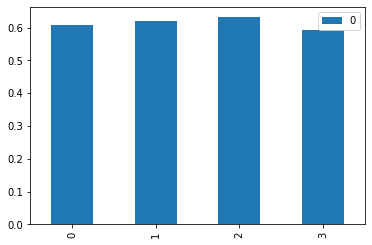

In [118]:
ngram_scores_df.plot(kind='bar')

# Show the plot
plt.show()